# DECISION TREE

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum05/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(path + "/data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Melihat informasi struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Cek Missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Mengubah nama kolom agar lebih mudah diakses
df = df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
})

# Cek hasil rename
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Mengubah label species menjadi kategori numerik
species_cat = df['species'].astype('category')
species_classes = list(species_cat.cat.categories)  # menyimpan urutan label asli
df['species'] = species_cat.cat.codes               # ubah ke bentuk numerik

# Menampilkan urutan label dan contoh hasil encoding
print("Urutan label species:", species_classes)
df


Urutan label species: [0, 1, 2]


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


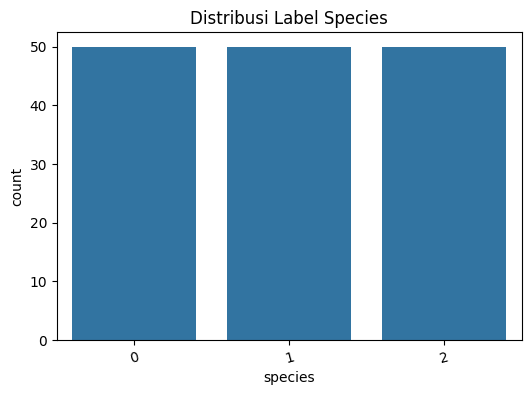

In [ ]:
# Visualisasi distribusi label species
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title('Distribusi Label Species')
plt.xticks(rotation=15)
plt.show()

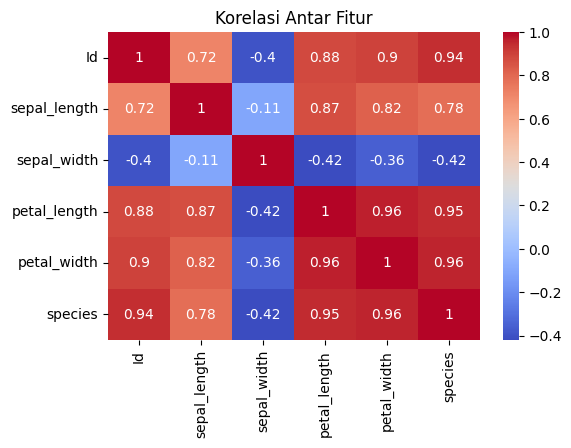

In [ ]:
# Melihat korelasi antar fitur numerik
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [ ]:
# Memilih fitur dan target
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
y = df['species']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Menampilkan jumlah data train dan test
len(X_train), len(X_test)

(120, 30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model (baseline)
dt = DecisionTreeClassifier(
    criterion='gini',   # sesuai modul (impurity Gini)
    max_depth=3,        # baseline agar tidak overfitting (akan kita tuning nanti)
    random_state=42
)

# Melatih model menggunakan data training
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

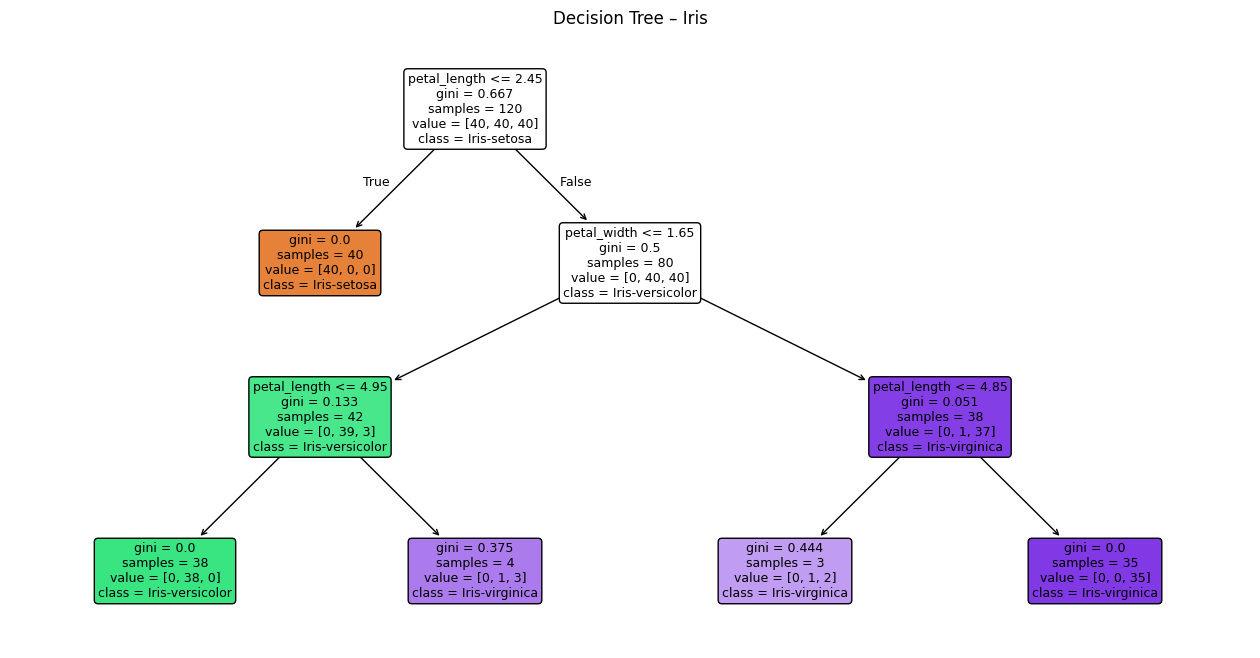

In [ ]:
# Visualisasi model
plt.figure(figsize=(16,8))
plot_tree(dt,
          feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
          class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
          filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree – Iris")
plt.show()

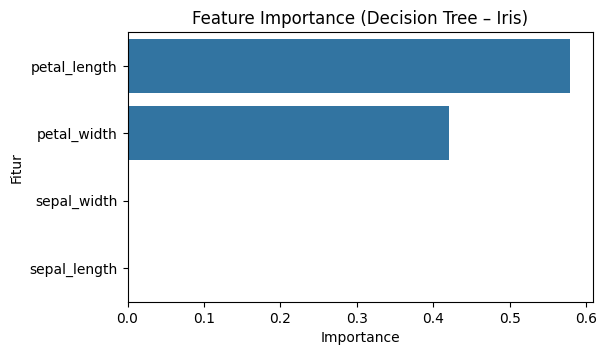

,0
petal_length,0.579077
petal_width,0.420923
sepal_width,0.000000
sepal_length,0.000000


In [ ]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_,
                index=['sepal_length','sepal_width','petal_length','petal_width']
               ).sort_values(ascending=False)

plt.figure(figsize=(6,3.5))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree – Iris)")
plt.xlabel("Importance"); plt.ylabel("Fitur")
plt.show()

imp

In [ ]:
# Mencari nilai max_depth terbaik
scores = {}
for d in range(2, 9):  # kedalaman pohon diuji dari 2 sampai 8
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

# Menampilkan hasil akurasi tiap depth
print(scores)

# Menentukan max_depth terbaik
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Akurasi:", round(scores[best_d]*100, 2), "%")

{2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9333333333333333, 5: 0.9333333333333333, 6: 0.9333333333333333, 7: 0.9333333333333333, 8: 0.9333333333333333}
Best max_depth: 3 | Akurasi: 96.67 %


In [ ]:
# Menggunakan data testing untuk menguji model
y_pred_test = dt.predict(X_test)

# Menampilkan 10 hasil prediksi pertama vs label sebenarnya
hasil_uji = pd.DataFrame({
    "SepalLength": X_test['sepal_length'].values,
    "SepalWidth": X_test['sepal_width'].values,
    "PetalLength": X_test['petal_length'].values,
    "PetalWidth": X_test['petal_width'].values,
    "Actual Species": y_test.replace({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}).values,
    "Predicted Species": y_pred_test
})

# Mengubah prediksi angka ke label teks agar mudah dibaca
hasil_uji["Predicted Species"] = hasil_uji["Predicted Species"].replace({0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'})

# Menampilkan hasil
hasil_uji.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Actual Species,Predicted Species
0,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
1,6.1,3.0,4.9,1.8,Iris-virginica,Iris-virginica
2,4.9,2.4,3.3,1.0,Iris-versicolor,Iris-versicolor
3,5.0,2.3,3.3,1.0,Iris-versicolor,Iris-versicolor
4,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,4.7,1.6,Iris-versicolor,Iris-versicolor
6,4.6,3.6,1.0,0.2,Iris-setosa,Iris-setosa
7,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa
8,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
9,5.4,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor


In [ ]:
import os
from sklearn.linear_model import LinearRegression
import joblib

# Pastikan folder models/ ada
os.makedirs("/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum05/models", exist_ok=True)

model_path = "/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum05/models/model_iris.pkl"
joblib.dump(dt, model_path)

['/content/gdrive/MyDrive/semester7/MachineLearning/praktikum_ml/praktikum05/models/model_iris.pkl']